# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [1]:
!pip install prophet

Installing the yfinance package, which provides financial market data from Yahoo Finance

In [2]:

!pip install yfinance --upgrade --no-cache-dir

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is ABR. (or any other on the list ex.  '^GSPC'. '^GSPC' is the S & P 500 Ticker Symbol)

To view
[Ticker Symbols list](https://stockanalysis.com/stocks/)

In [3]:
# import libraries
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import matplotlib.pyplot as plt

import yfinance as yf

from datetime import timedelta



In [4]:
# stock='^GSPC'

In [5]:
stock='ABR'

In [6]:
start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

[*********************100%***********************]  1 of 1 completed


In [7]:
# Most historic Stock Prices
df.head()

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,ABR,ABR,ABR,ABR,ABR,ABR,ABR
Date,,,,,,,
2004-04-07,3.699244,0.0,3.717289,3.618041,3.618041,0.0,3707500
2004-04-08,3.686611,0.0,3.699243,3.673980,3.699243,0.0,301200
2004-04-12,3.522403,0.0,3.690222,3.504358,3.690222,0.0,852900
2004-04-13,3.520598,0.0,3.527816,3.491726,3.520598,0.0,226800
2004-04-14,3.506161,0.0,3.515184,3.500748,3.500748,0.0,143900


In [8]:
# Most recent stock prices
df.tail()


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,ABR,ABR,ABR,ABR,ABR,ABR,ABR
Date,,,,,,,
2025-03-07,12.23,0.43,12.33,11.67,11.81,0.0,5343800
2025-03-10,12.32,0.00,12.73,12.08,12.10,0.0,6886300
2025-03-11,12.05,0.00,12.39,11.86,12.37,0.0,4910600
2025-03-12,12.26,0.00,12.32,12.06,12.11,0.0,4102300
2025-03-13,12.06,0.00,12.35,12.04,12.30,0.0,2704700


View Closing values only

In [9]:
df = df.loc[:, ['Close']]

In [10]:
# Most historic Stock closing Prices
df.head()

Price,Close
Ticker,ABR
Date,
2004-04-07,3.699244
2004-04-08,3.686611
2004-04-12,3.522403
2004-04-13,3.520598
2004-04-14,3.506161


In [11]:
# Most recent stock closing prices
df.tail()


Price,Close
Ticker,ABR
Date,
2025-03-07,12.23
2025-03-10,12.32
2025-03-11,12.05
2025-03-12,12.26
2025-03-13,12.06


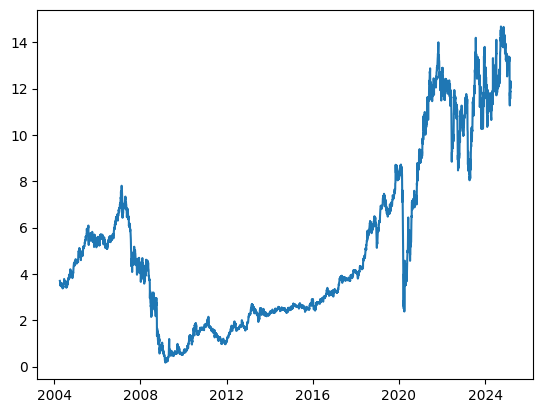

In [12]:
plt.plot(df['Close'])

 In Facebook's Prophet forecasting library, the DataFrame you pass to the model must have two columns: "ds" and "y". The "ds" (datestamp) column should contain the dates, typically in 'YYYY-MM-DD' format for daily data or datetime format for sub-daily data. The "y" column must contain the numerical values we want to forecast or model.

So if you are working with a DataFrame that has a "Date" column and you want to use it with Prophet, you would need to rename it to "ds"

In [13]:
print(df.columns)

# Flatten the MultiIndex and convert it into regular columns
df.columns = df.columns.get_level_values(0)  # Get only the first level of the MultiIndex

# Ensure that the date column is in the DataFrame (if it's in the index, move it to a column)
df['Date'] = df.index

# Rename the columns for Prophet: 'Date' to 'ds' and 'Close' (or whichever column you need) to 'y'
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

# Check the final structure of the DataFrame
df.head()

MultiIndex([('Close', 'ABR')],
           names=['Price', 'Ticker'])


Price,y,ds
Date,,
2004-04-07,3.699244,2004-04-07
2004-04-08,3.686611,2004-04-08
2004-04-12,3.522403,2004-04-12
2004-04-13,3.520598,2004-04-13
2004-04-14,3.506161,2004-04-14


In [14]:
# #date is the index so you need to make it a column
# df["Date"] = df.index
# df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


In [15]:
df.tail()

Price,y,ds
Date,,
2025-03-07,12.23,2025-03-07
2025-03-10,12.32,2025-03-10
2025-03-11,12.05,2025-03-11
2025-03-12,12.26,2025-03-12
2025-03-13,12.06,2025-03-13


# Make Stock Predictions using Facebook's Prophet

In [16]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsgt78av/hygwlp6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsgt78av/eg4wfeof.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23184', 'data', 'file=/tmp/tmpgsgt78av/hygwlp6s.json', 'init=/tmp/tmpgsgt78av/eg4wfeof.json', 'output', 'file=/tmp/tmpgsgt78av/prophet_modela34qj6ty/prophet_model-20250314221849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:19:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:

future = model.make_future_dataframe(periods=151)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5413,2025-08-07,13.161107,12.101794,14.127939
5414,2025-08-08,13.167069,12.139067,14.193773
5415,2025-08-09,13.236546,12.227115,14.254189
5416,2025-08-10,13.236245,12.193244,14.305908
5417,2025-08-11,13.167908,12.155925,14.243921


In [18]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small


In [19]:
plot_components_plotly(model, forecast)


/usr/local/lib/python3.11/dist-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



# Deploy on Gradio

In [20]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

In [21]:
import gradio as gr
from datetime import datetime, timedelta
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly

def predict_stock(stock_ticker, start_date, end_date, periods):
    df = yf.download(stock_ticker, start=start_date, end=end_date, auto_adjust=True, actions='inline', progress=False)
    df = df.loc[:, ['Close']]
    df["Date"] = df.index
    df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

    model = Prophet()
    model.fit(df)

    future = model.make_future_dataframe(periods=int(periods))
    forecast = model.predict(future)

    fig = plot_plotly(model, forecast)
    return fig

with gr.Blocks() as demo:
    stock_ticker = gr.Textbox(label="Stock Ticker Symbol")
    start_date = gr.Textbox(label="Start Date (YYYY-MM-DD)", value=(datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d'))
    end_date = gr.Textbox(label="End Date (YYYY-MM-DD)", value=datetime.now().strftime('%Y-%m-%d'))
    periods = gr.Number(label="Number of Days to Predict", value=30)

    outputs = gr.Plot()

    submit_button = gr.Button("Predict")
    submit_button.click(predict_stock, inputs=[stock_ticker, start_date, end_date, periods], outputs=outputs)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c152984fbfc63b5cd5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Deploy on Huggingface Spaces - Public Deployment

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)

In [22]:
!gradio deploy


Need 'write' access token to create a Spaces repo.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_http.py:406 in                    │
│ hf_raise_for_status                                                                     

#Interview Readiness Questions
1. Choose a new Ticker Symbol.  What is your ticker symbol?
2. What were the future price predictions
3. What were the initial price predictions

# Answer 1: What is my ticker symbol?

In [29]:
# chossing a new ticker Symbol. My ticker symbol is: AAPL (Apple Inc.)


# import libraries
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import matplotlib.pyplot as plt

import yfinance as yf

from datetime import timedelta



In [30]:
stock='AAPL'  # My ticker symbol is: AAPL (Apple Inc.)

In [31]:
start = '2000-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

[*********************100%***********************]  1 of 1 completed


# Answer 2: What were the future price predictions?

In [32]:
# Most recent stock prices
df.tail()


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,,
2025-03-07,239.070007,0.0,241.369995,234.759995,235.110001,0.0,46273600
2025-03-10,227.479996,0.0,236.160004,224.220001,235.539993,0.0,72071200
2025-03-11,220.839996,0.0,225.839996,217.449997,223.809998,0.0,76137400
2025-03-12,216.979996,0.0,221.750000,214.910004,220.139999,0.0,62547500
2025-03-13,209.679993,0.0,216.839996,208.419998,215.949997,0.0,61368300


# Answer 3: What were the initial price predictions?

In [33]:
# Most historic Stock Prices
df.head()

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,,
2000-01-03,0.842151,0.0,0.846382,0.765036,0.789017,0.0,535796800
2000-01-04,0.771149,0.0,0.832276,0.761274,0.814408,0.0,512377600
2000-01-05,0.782433,0.0,0.831806,0.774910,0.780552,0.0,778321600
2000-01-06,0.714723,0.0,0.805004,0.714723,0.798421,0.0,767972800
2000-01-07,0.748578,0.0,0.759864,0.718485,0.726008,0.0,460734400


# References
[HuggingFace](www.huggingface.co)

[Gradio](https://www.gradio.app/guides/quickstart)


1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV

3. [Sample Streamlit Deployment - Prophet](https://prophet.streamlit.app/?ref=streamlit-io-gallery-favorites)
